In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
PATH = 'data/chest-xray/'

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Dataset from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
sz=299
arch=resnext50
bs=16

In [4]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


 74%|███████▍  | 241/326 [00:01<00:01, 72.39it/s, loss=1.1]  


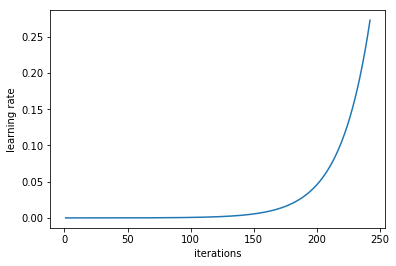

In [6]:
lrf=learn.lr_find()
learn.sched.plot_lr()

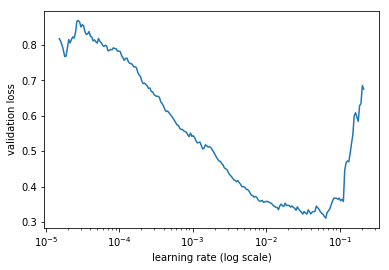

In [7]:
learn.sched.plot()

In [8]:
lr = 0.009
learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.168372   0.141622   0.9375    
    1      0.157902   0.174245   0.9375                      



[0.17424531280994415, 0.9375]

In [9]:
learn.unfreeze()
learn.bn_freeze(True)
lr=np.array([lr/9,lr/3,lr])
learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.122483   0.046767   1.0       
    1      0.137366   0.037608   1.0                          



[0.03760816156864166, 1.0]